# Checking quality of the reads - Working with FASTQ files
Here, we will work with FASTQ files, the standard format output used by modern sequencers.

 We will learn how to work with quality scores per base.

### Context: 
- When nucleotides are sequenced, the process generates raw data in the form of short sequences, called "reads". 
- Quality score (aka Phred score) is the logarithmic representation of the estimated probability that the nucleotide assignment is incorrect at a given position in the read.
- Phred score = -10 * log10(probability of incorrect nucleotide assignment). Thus, higher the Phred score, lower the chances that the nucleotide assignment is incorrect.
-  Researchers often apply quality score thresholds to filter out low-quality reads from their datasets, ensuring that only reliable data is used for downstream analysis.

## Getting the data

In [2]:
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

The system cannot find the path specified.
--2023-07-01 14:01:35--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => 'SRR003265.filt.fastq.gz'
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.140
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.140|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

     0K .......... .......... .......... .......... ..........  0% 69.4K 6m46s
    50K .......... .......... .......... .......... ..........  0%  298K 4m10s
   100K .......... .......... .......... .......... ..........  0% 1.83M 2m51s
   150K .......... .......... .......... .......... .

## Reading FASTQ files

In [3]:
from collections import defaultdict
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations) # quality scores of our reads, per letter

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


## Distribution of Nucleotide Reads

In [4]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        count[letter] += 1
tot = sum(count.values())
for letter, count in count.items():
    print('%s: %.2f %d' % (letter, 100. * count / tot, count))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


N = Uncalled base

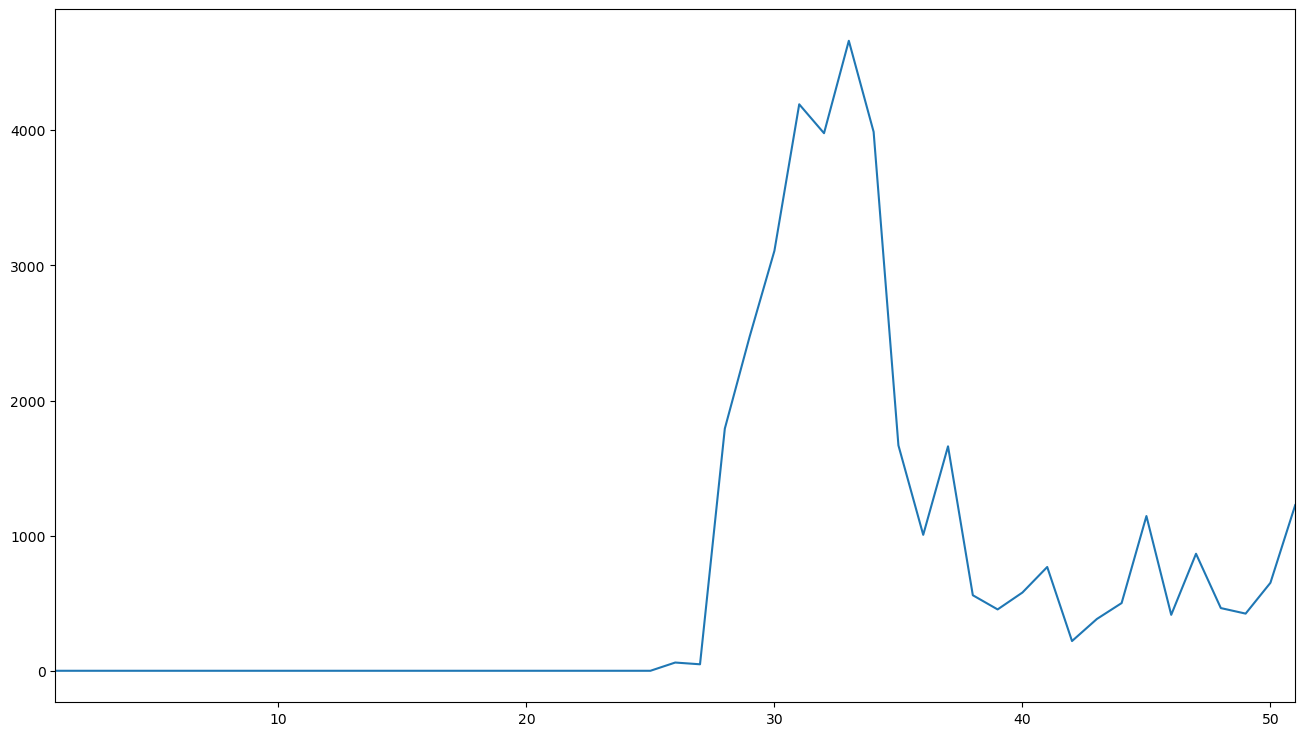

In [7]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)
pass

Interpretaion: On average, in the range of 28 to 36, the number of uncalled bases peaks in all the reads.

## Quality of Reads

In [8]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


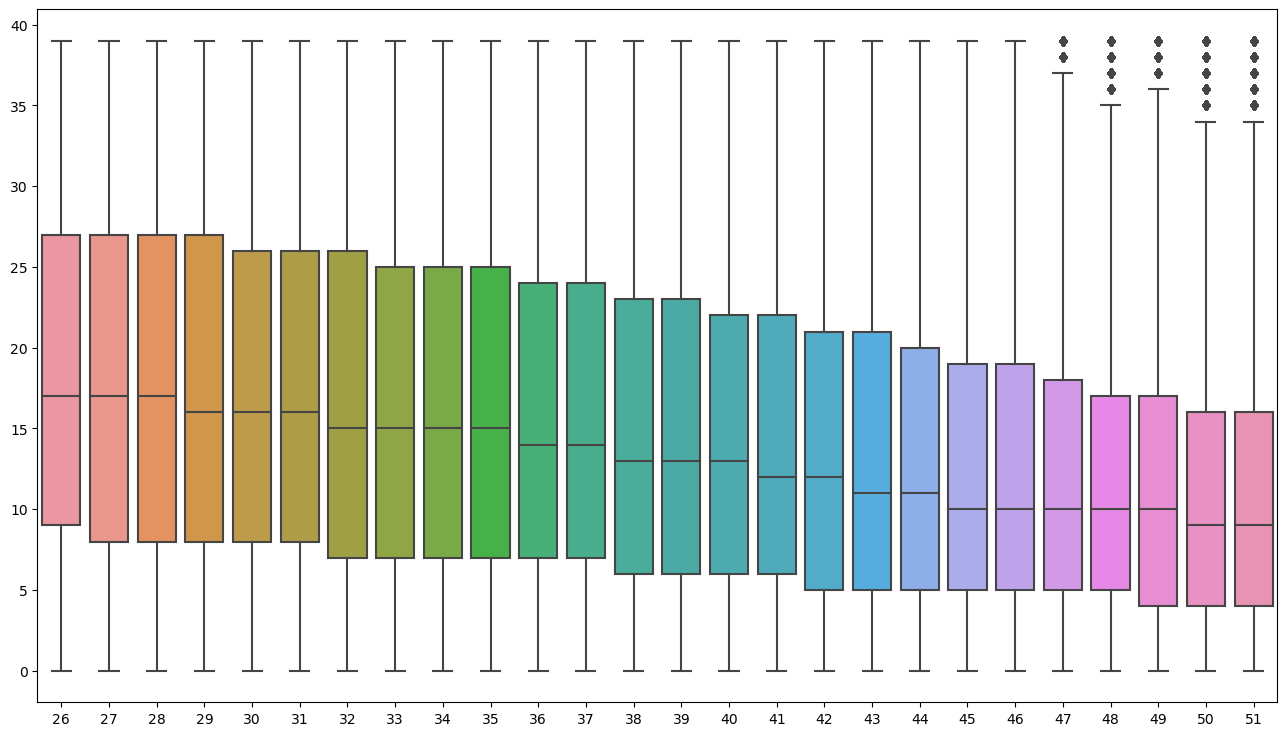

In [9]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
pass

Interpretation: Each box plot denotes a read, with their range of quality scores for each nucleotide assignment.

### Summary: In this tutorial, we parsed through the reads in a fastq file, count the phred scores for each reads, visualized the range of nucleotide positions where the number of uncalled bases peaks, and finally visualized the range of phred scores for a subset of total reads.

# Finish!